In [1]:
import pandas as pd
pd.set_option('display.max_columns', 35)

south_sudan_violence_data = pd.read_csv("Raw_Data/ACLED_south-sudan.csv")
south_sudan_violence_data.head(3)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,1954460,728,SSD5333,5333,2018/11/9,2018,1,Violence against civilians,Aluakluak Communal Militia (South Sudan),NaN,4,Civilians (South Sudan),NaN,7,47,Eastern Africa,South Sudan,Lakes,Rumbek East,Alamtoch West,Akot,6.5520,30.0591,2,Radio Tamazuj,Regional,"On November 9th, a local chief and his son wer...",2,1542043972,SSD
1,1954459,728,SSD5332,5332,2018/11/6,2018,1,Violence against civilians,Unidentified Armed Group (South Sudan),NaN,3,Civilians (South Sudan),NaN,7,37,Eastern Africa,South Sudan,Western Bahr el Ghazal,Wau,Udici,Wau,7.7177,28.0071,1,Radio Voice of Hope,Subnational,"On November 6th, a group of ""unknown gunmen"" f...",1,1542043972,SSD
2,1899867,728,SSD5330,5330,2018/11/2,2018,1,Strategic development,SPLA/M-In Opposition: Sudanese Peoples Liberat...,NaN,2,Government of South Sudan (2011-),NaN,1,12,Eastern Africa,South Sudan,Central Equatoria,Juba,Juba,Juba,4.8609,31.6178,1,Radio Miraya; Sudan Tribune,National-Regional,"On November 2nd, two prominent SPLM-IO detaine...",0,1541443581,SSD


### Work to split up the dates

In [2]:
south_sudan_violence_data['Month']=[d.split('/')[1] for d in south_sudan_violence_data.event_date]
south_sudan_violence_data['Day']=[d.split('/')[2] for d in south_sudan_violence_data.event_date]
south_sudan_violence_data.head(3)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,Month,Day
0,1954460,728,SSD5333,5333,2018/11/9,2018,1,Violence against civilians,Aluakluak Communal Militia (South Sudan),NaN,4,Civilians (South Sudan),NaN,7,47,Eastern Africa,South Sudan,Lakes,Rumbek East,Alamtoch West,Akot,6.5520,30.0591,2,Radio Tamazuj,Regional,"On November 9th, a local chief and his son wer...",2,1542043972,SSD,11,9
1,1954459,728,SSD5332,5332,2018/11/6,2018,1,Violence against civilians,Unidentified Armed Group (South Sudan),NaN,3,Civilians (South Sudan),NaN,7,37,Eastern Africa,South Sudan,Western Bahr el Ghazal,Wau,Udici,Wau,7.7177,28.0071,1,Radio Voice of Hope,Subnational,"On November 6th, a group of ""unknown gunmen"" f...",1,1542043972,SSD,11,6
2,1899867,728,SSD5330,5330,2018/11/2,2018,1,Strategic development,SPLA/M-In Opposition: Sudanese Peoples Liberat...,NaN,2,Government of South Sudan (2011-),NaN,1,12,Eastern Africa,South Sudan,Central Equatoria,Juba,Juba,Juba,4.8609,31.6178,1,Radio Miraya; Sudan Tribune,National-Regional,"On November 2nd, two prominent SPLM-IO detaine...",0,1541443581,SSD,11,2


#### Time Precision: <br> 
‘1’ is chosen as the precision level. If sources note a week, <br>
‘2’ is noted in the precision field and the first date of that week is used as the reference date. <br>
If sources note only that an activity took place within a particular month, without reference to the particular date, the month mid-point is chosen unless the beginning or end of month is noted (in which case, the first and last date are used, respectively) and ‘3’ as the precision level. 

In [3]:
south_sudan_violence_data.time_precision.value_counts()

1    4176
2     842
3     241
Name: time_precision, dtype: int64

In [4]:
sudan_event_type = south_sudan_violence_data.event_type.value_counts().rename_axis('type').reset_index(name='counts')

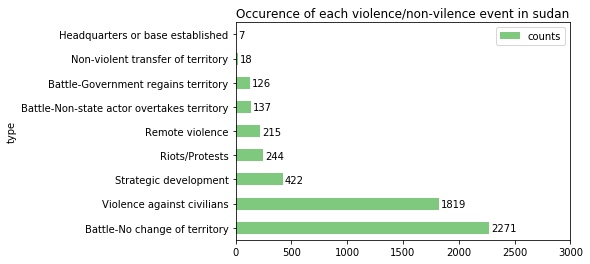

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

sudan_event_type.set_index("type", inplace=True, drop=True)

sudan_event_type.plot.barh(
    title = "Occurence of each violence/non-vilence event in sudan",
    xlim = (0,3000),
    colormap = plt.cm.Accent
)

for i, label in enumerate(list(sudan_event_type.index)):
    score = sudan_event_type.loc[label, "counts"]
    label = sudan_event_type.loc[label, "counts"]
    plt.annotate(str(label), (score + 20, i - 0.15))

plt.show()


#### Actors
All actors fall into 1 of 8 categories: <br>
Government or mutinous force = 1 <br>
Rebel force = 2<br>
Political militia = 3<br>
Ethnic militia = 4<br>
Rioters = 5<br>
Protesters = 6<br>
Civilians = 7<br>
Outside/external force (e.g. UN) = 8<br>

#### Interaction codes include:
10- SOLE MILITARY ACTION <br>
11- MILITARY VERSUS MILITARY <br>
12- MILITARY VERSUS REBELS <br>
13- MILITARY VERSUS POLITICAL MILITIA <br>
14- MILITARY VERSUS COMMUNAL MILITIA <br>
15- MILITARY VERSUS RIOTERS <br>
16- MILITARY VERSUS PROTESTERS <br>
17- MILITARY VERSUS CIVILIANS <br>
18- MILITARY VERSUS OTHER <br>
20- SOLE REBEL ACTION (e.g. base establishment) <br>
22- REBELS VERSUS REBELS <br>
23- REBELS VERSUS POLITICAL MILIITA <br>
24- REBELS VERSUS COMMUNAL MILITIA<br>
25- REBELS VERSUS RIOTERS<br>
26- REBELS VERSUS PROTESTERS<br>
27- REBELS VERSUS CIVILIANS<br>
28- REBELS VERSUS OTHERS<br>
30- SOLE POLITICAL MILITIA ACTION<br>
33- POLITICAL MILITIA VERSUS POLITICAL MILITIA <br>
34- POLITICAL MILITIA VERSUS COMMUNAL MILITIA <br>
35- POLITICAL MILITIA VERSUS RIOTERS<br>
36- POLITICAL MILITIA VERSUS PROTESTERS<br>
37- POLITICAL MILITIA VERSUS CIVILIANS<br>
38- POLITICAL MILITIA VERSUS OTHERS<br>
40- SOLE COMMUNAL MILITIA ACTION<br>
44- COMMUNAL MILITIA VERSUS COMMUNAL MILITIA <br>
45- COMMUNAL MILITIA VERSUS RIOTERS<br>
46- COMMUNAL MILITIA VERSUS PROTESTERS<br>
47- COMMUNAL MILITIA VERSUS CIVILIANS<br>
48- COMMUNAL MILITIA VERSUS OTHER <br>
50- SOLE RIOTER ACTION<br>
55- RIOTERS VERSUS RIOTERS<br>
56- RIOTERS VERSUS PROTESTERS<br>
57- RIOTERS VERSUS CIVILIANS<br>
58- RIOTERS VERSUS OTHERS<br>
60- SOLE PROTESTER ACTION<br>
66- PROTESTERS VERSUS PROTESTERS <br>
67- PROTESTERS VERSUS CIVILIANS 68- PROTESTERS VERSUS OTHER<br>
78- OTHER ACTOR VERSUS CIVILIANS <br>
80- SOLE OTHER ACTION<br>

#### Drop uninterest data

In [6]:
to_drop = ['iso','event_id_cnty','event_id_no_cnty','country',
           'region','timestamp','iso3','assoc_actor_1', 'assoc_actor_2', 'source', 'source_scale','notes']
south_sudan_violence_data.drop(to_drop, inplace=True, axis=1)

#### Rename columns

In [7]:
new_names = {
    "inter1": "actor1_type",
    "inter2": "actor2_type",
    "interaction": "interaction_type",
    "admin1": "region1",
    "admin2": "region2",
    "admin3": "region3"
}

south_sudan_violence_data.rename(columns=new_names, inplace=True)

In [8]:
south_sudan_violence_data.head(3)

,data_id,event_date,year,time_precision,event_type,actor1,actor1_type,actor2,actor2_type,interaction_type,region1,region2,region3,location,latitude,longitude,geo_precision,fatalities,Month,Day
0,1954460,2018/11/9,2018,1,Violence against civilians,Aluakluak Communal Militia (South Sudan),4,Civilians (South Sudan),7,47,Lakes,Rumbek East,Alamtoch West,Akot,6.5520,30.0591,2,2,11,9
1,1954459,2018/11/6,2018,1,Violence against civilians,Unidentified Armed Group (South Sudan),3,Civilians (South Sudan),7,37,Western Bahr el Ghazal,Wau,Udici,Wau,7.7177,28.0071,1,1,11,6
2,1899867,2018/11/2,2018,1,Strategic development,SPLA/M-In Opposition: Sudanese Peoples Liberat...,2,Government of South Sudan (2011-),1,12,Central Equatoria,Juba,Juba,Juba,4.8609,31.6178,1,0,11,2


In [10]:
south_sudan_violence_data[south_sudan_violence_data['actor2_type'] == 0].head(20)

,data_id,event_date,year,time_precision,event_type,actor1,actor1_type,actor2,actor2_type,interaction_type,region1,region2,region3,location,latitude,longitude,geo_precision,fatalities,Month,Day
7,1899863,2018/10/29,2018,1,Riots/Protests,Protesters (South Sudan),6,NaN,0,60,Jonglei,Bor South,Makuac,Bor,6.2144,31.5620,2,0,10,29
38,1893125,2018/10/13,2018,1,Riots/Protests,Rioters (South Sudan),5,NaN,0,50,Lakes,Rumbek Centre,Kuei,Rumbek,6.8190,29.7000,1,0,10,13
75,1953942,2018/10/2,2018,1,Strategic development,Military Forces of South Sudan (2011-),1,NaN,0,10,Central Equatoria,Juba,Juba,Juba,4.8609,31.6178,1,0,10,2
80,1953941,2018/10/1,2018,2,Strategic development,Military Forces of South Sudan (2011-),1,NaN,0,10,Lakes,Cueibet,Cueibet,Cueibet,7.0317,29.2472,2,0,10,1
83,1953939,2018/9/28,2018,1,Strategic development,PDM-P: People's Democratic Movement for Peace,3,NaN,0,30,Central Equatoria,Juba,Juba,Juba,4.8609,31.6178,3,0,9,28
89,1953937,2018/9/26,2018,2,Strategic development,Chukudum Communal Militia (South Sudan),4,NaN,0,40,Eastern Equatoria,Budi,Ngarich,Kidepo,4.6675,33.1526,2,0,9,26
113,1859824,2018/9/10,2018,1,Strategic development,Government of South Sudan (2011-),1,NaN,0,10,Central Equatoria,Juba,Juba,Juba,4.8609,31.6178,1,0,9,10
118,1756492,2018/9/6,2018,1,Strategic development,Military Forces of South Sudan (2011-),1,NaN,0,10,Central Equatoria,Juba,Juba,Juba,4.8609,31.6178,1,0,9,6
121,1756489,2018/9/5,2018,1,Strategic development,Liech Communal Militia (South Sudan),4,NaN,0,40,Unity,Koch,Guit,Koch,8.6048,29.9905,2,0,9,5
139,1756241,2018/8/25,2018,1,Strategic development,SSPM/A: South Sudan Patriotic Movement/Army,2,NaN,0,20,Central Equatoria,Juba,Juba,Juba,4.8609,31.6178,1,0,8,25


In [20]:
#south_sudan_violence_data['Coordinates'] = list(zip(south_sudan_violence_data.longitude, south_sudan_violence_data.latitude))

In [21]:
Map = {1:'Government or mutinous force',
2:'Rebel force',
3:'Political militia',
4: 'Ethnic militia',
5: 'Rioters',
6: 'Protesters',
7: 'Civilians',
8: 'Outside/external force (e.g. UN)'}

south_sudan_violence_data['actor1_type'].replace(Map, inplace = True)
south_sudan_violence_data['actor2_type'].replace(Map, inplace = True)

In [22]:
#south_sudan_violence_data.to_csv("ACLED_south-sudan_cleaned.csv", sep=',')

## Data Visualization

In [23]:
%%HTML
<div class='tableauPlaceholder' id='viz1547980084720' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;So&#47;SouthSudanViolenceData&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='SouthSudanViolenceData&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;So&#47;SouthSudanViolenceData&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1547980084720');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1000px';vizElement.style.height='827px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

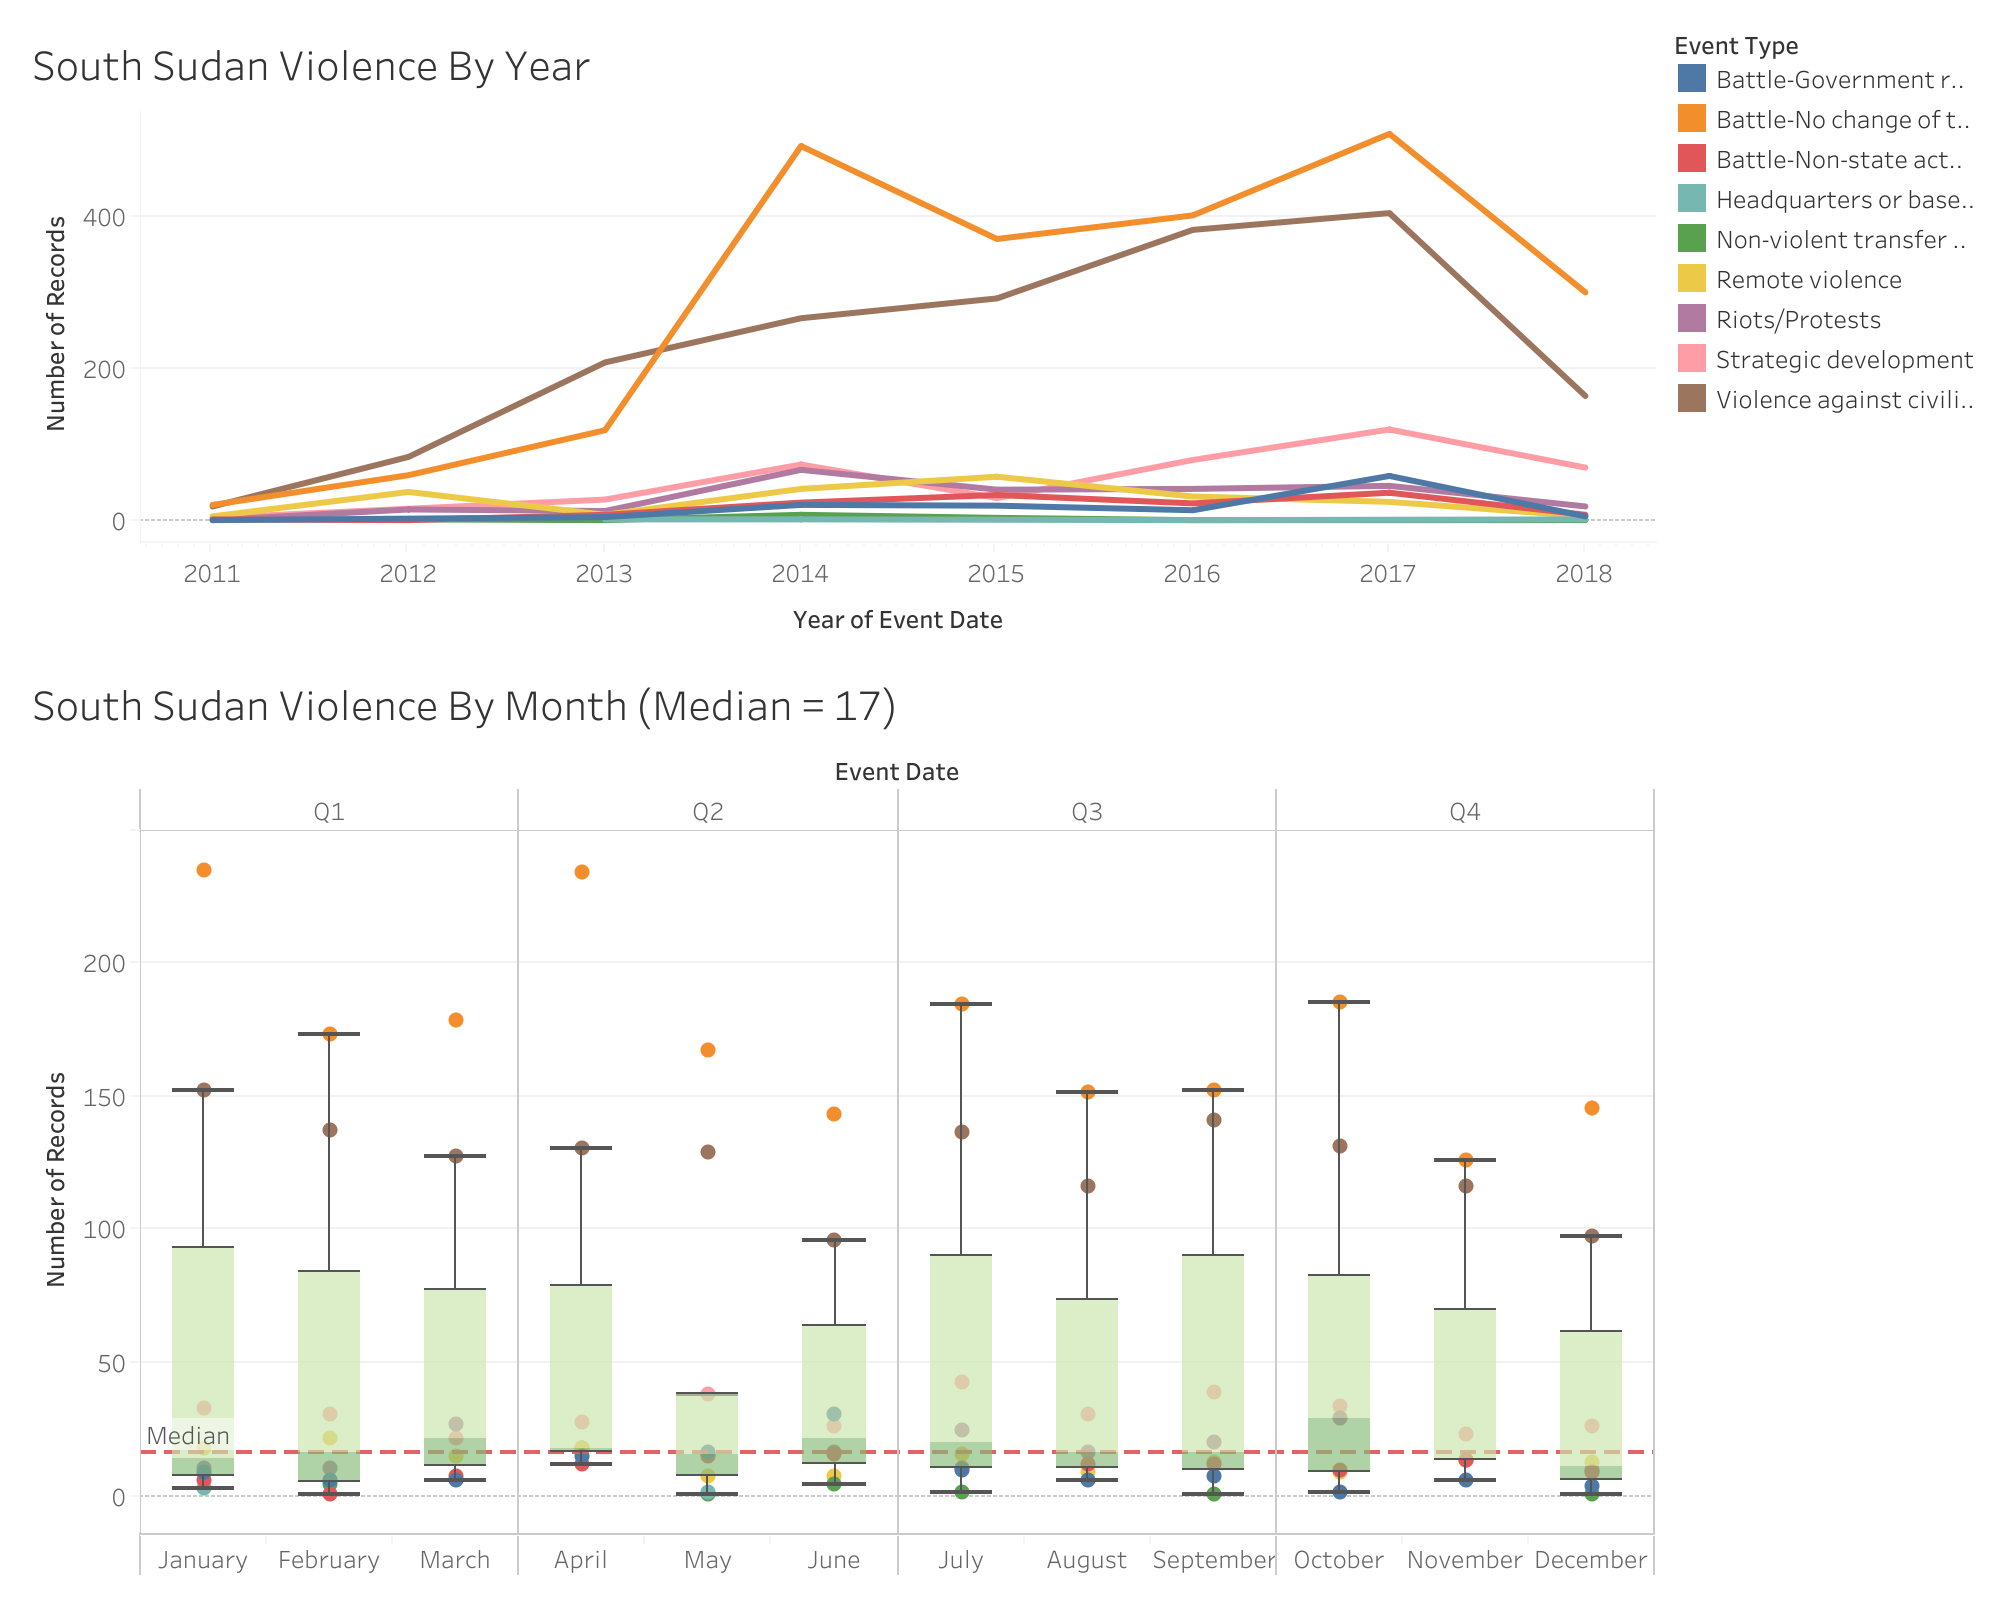

In [28]:
from IPython.display import Image
Image(filename='Results_ACLED/Dashboard 1.png') 

<p> In average, about 80 violence incidents happen in each year. Since the civil war happened in 2013, the number of violence events with the type: <b> Battle - No Change of Territory </b> and <b> Violence against Civilians </b> has been increasing. Since 2014, 17 violence events happen in average, from the graph, we can see that the month that has the most violence events is probably <b> October </b>, with median of 29 violence events. However, overall, violence events happen throughout the year and doesn't have any special pinpointed from the graph.